# 1.0 Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
 

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# 2.0 Loading Dataset


In [2]:
df_raw = pd.read_csv("dataset.csv")
df_raw = df_raw.rename(columns={"Attrition": "Resignation"})
df_raw.head()

,Age,Resignation,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# 3.0 Split into train and test data

I'm splitting the dataset at this point because that way the test data will simulate the production data, that is, never seen data.

In [3]:
X = df_raw.drop('Resignation', axis = 1)
y = df_raw[['Resignation']]

In [4]:
test_size = 0.3
seed = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [5]:
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (1029, 34)
y_train: (1029, 1)
X_test: (441, 34)
y_test: (441, 1)


In [6]:
df_raw = pd.concat([X_train, y_train], axis=1)

# 4.0 Descriptive Analisys

In [7]:
df_raw.shape

(1029, 35)

In [8]:
df_raw.iloc[:, 0:17].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1029 entries, 714 to 1126
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1029 non-null   int64 
 1   BusinessTravel           1029 non-null   object
 2   DailyRate                1029 non-null   int64 
 3   Department               1029 non-null   object
 4   DistanceFromHome         1029 non-null   int64 
 5   Education                1029 non-null   int64 
 6   EducationField           1029 non-null   object
 7   EmployeeCount            1029 non-null   int64 
 8   EmployeeNumber           1029 non-null   int64 
 9   EnvironmentSatisfaction  1029 non-null   int64 
 10  Gender                   1029 non-null   object
 11  HourlyRate               1029 non-null   int64 
 12  JobInvolvement           1029 non-null   int64 
 13  JobLevel                 1029 non-null   int64 
 14  JobRole                  1029 non-null   ob

In [9]:
df_raw.iloc[:, 17:].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1029 entries, 714 to 1126
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   MonthlyIncome             1029 non-null   int64 
 1   MonthlyRate               1029 non-null   int64 
 2   NumCompaniesWorked        1029 non-null   int64 
 3   Over18                    1029 non-null   object
 4   OverTime                  1029 non-null   object
 5   PercentSalaryHike         1029 non-null   int64 
 6   PerformanceRating         1029 non-null   int64 
 7   RelationshipSatisfaction  1029 non-null   int64 
 8   StandardHours             1029 non-null   int64 
 9   StockOptionLevel          1029 non-null   int64 
 10  TotalWorkingYears         1029 non-null   int64 
 11  TrainingTimesLastYear     1029 non-null   int64 
 12  WorkLifeBalance           1029 non-null   int64 
 13  YearsAtCompany            1029 non-null   int64 
 14  YearsInCurrentRole        1

In [10]:
df_raw.iloc[:, :17].nunique().sort_values(ascending=False)

EmployeeNumber             1029
DailyRate                   710
HourlyRate                   71
Age                          43
DistanceFromHome             29
JobRole                       9
EducationField                6
Education                     5
JobLevel                      5
EnvironmentSatisfaction       4
JobInvolvement                4
JobSatisfaction               4
BusinessTravel                3
Department                    3
MaritalStatus                 3
Gender                        2
EmployeeCount                 1
dtype: int64

In [11]:
df_raw.iloc[:, 17:].nunique().sort_values(ascending=False)

MonthlyRate                 1010
MonthlyIncome                963
TotalWorkingYears             40
YearsAtCompany                32
YearsInCurrentRole            19
YearsWithCurrManager          17
YearsSinceLastPromotion       16
PercentSalaryHike             15
NumCompaniesWorked            10
TrainingTimesLastYear          7
WorkLifeBalance                4
StockOptionLevel               4
RelationshipSatisfaction       4
PerformanceRating              2
OverTime                       2
Resignation                    2
StandardHours                  1
Over18                         1
dtype: int64

I'll exclude all features that have only 1 distinct value because these features have variance = 0 and that's bad for the model

In [12]:
df_raw_numeric = df_raw.select_dtypes('int64')

kurt = pd.DataFrame(df_raw_numeric.apply(lambda x: x.kurtosis())).T
skew = pd.DataFrame(df_raw_numeric.apply(lambda x: x.skew())).T
variance = pd.DataFrame(df_raw_numeric.var().round(2)).applymap(lambda x: "{:.{}f}".format(x, 2) if isinstance(x, (float)) else x).T
desc = pd.DataFrame(df_raw_numeric.describe())

df_stats = pd.concat([desc,  kurt, skew, variance]).T.reset_index()
df_stats.columns = ['atributos','count', 'mean', 'std','min', '25%', '50%', '75%', 'max', 'kurtosis', 'skew', 'variance']
df_stats

,atributos,count,mean,std,min,25%,50%,75%,max,kurtosis,skew,variance
0,Age,1029.0,36.910593,9.263531,18.0,30.0,35.0,43.0,60.0,-0.471263,0.403126,85.81
1,DailyRate,1029.0,802.620019,407.368993,102.0,464.0,804.0,1167.0,1496.0,-1.218684,-0.005694,165949.50
2,DistanceFromHome,1029.0,9.364431,8.222723,1.0,2.0,7.0,14.0,29.0,-0.30753,0.931019,67.61
3,Education,1029.0,2.892128,1.053541,1.0,2.0,3.0,4.0,5.0,-0.648794,-0.273762,1.11
4,EmployeeCount,1029.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.00
5,EmployeeNumber,1029.0,1024.367347,606.301635,1.0,496.0,1019.0,1553.0,2068.0,-1.20654,0.021478,367601.67
6,EnvironmentSatisfaction,1029.0,2.683188,1.096829,1.0,2.0,3.0,4.0,4.0,-1.242343,-0.265805,1.20
7,HourlyRate,1029.0,66.680272,20.474094,30.0,48.0,67.0,84.0,100.0,-1.212044,-0.088747,419.19
8,JobInvolvement,1029.0,2.713314,0.710146,1.0,2.0,3.0,3.0,4.0,0.2552,-0.503142,0.50
9,JobLevel,1029.0,2.043732,1.118918,1.0,1.0,2.0,3.0,5.0,0.322603,1.024197,1.25


The features appear to have a distribution close to the normal distribution. Almost all features have skewness around 0, which may indicate that the data is not very concentrated.

In [13]:
print(f"The dataset is highly unbalanced")
print(f"Class No (Not Resgign): {round(df_raw.groupby('Resignation').size()[0] / df_raw.shape[0] * 100, 2)}%")
print(f"Class Yes (Resgign): {round(df_raw.groupby('Resignation').size()[1] / df_raw.shape[0] * 100, 2)}%")


The dataset is highly unbalanced
Class No (Not Resgign): 82.9%
Class Yes (Resgign): 17.1%


In [14]:
color_by_class = {
    "Yes": "#4E2F2F",
    "No": "#31688E"
}


fig = px.histogram(df_raw, x="Resignation", color="Resignation", color_discrete_map=color_by_class)
fig.update_layout(
    title="Resignation Distribution",
    xaxis_title="Class",
    yaxis_title="Number of employees",
    height=400, 
    width=600 
)
fig.show()

It's possible to notice that there is an unbalanced class. More than 82% of the employees didn't resign.


# 5.0 EDA - Exploratory Data Analisys

In [15]:
df_eda = df_raw.copy()

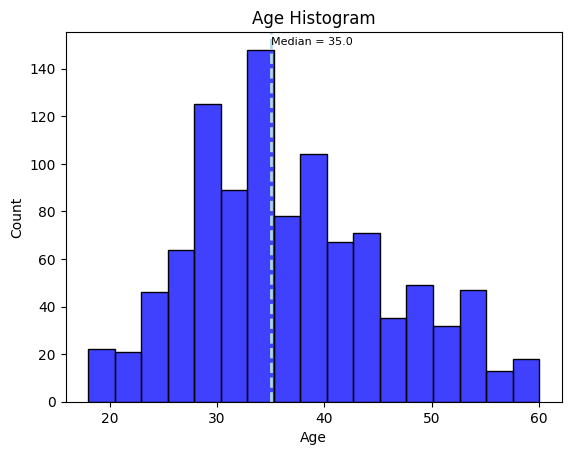

In [16]:
median_age = df_eda.Age.median()

_ = sns.histplot(df_eda.Age, color="blue")
_ = plt.axvline(median_age, color="lightblue", linestyle="dashed", linewidth=2)
_ = plt.title("Age Histogram")
_ = plt.text(x=df_eda.Age.median(), y=150, s=f"Median = {median_age}", fontsize=8)
_ = plt.show()


In [17]:
fig = px.histogram(df_eda.Education, x="Education" ,color="Education")
fig.update_layout(
    title="Education Histogram",
    height=400,
    width=600
)
fig.show()


In [18]:
fig = px.histogram(df_eda.MaritalStatus, x="MaritalStatus" ,color="MaritalStatus")
fig.update_layout(
    title="MaritalStatus Histogram",
    height=400,
    width=600
)
fig.show()


In [19]:
fig = px.histogram(df_eda.Gender, x="Gender" ,color="Gender")
fig.update_layout(
    title="Gender Histogram",
    height=400,
    width=600
)
fig.show()

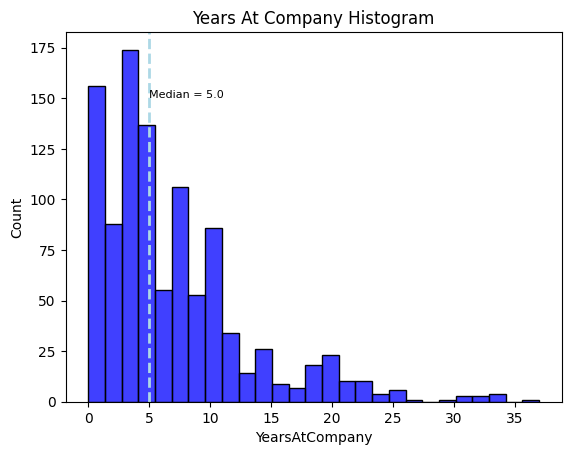

In [20]:
median_YearsAtCompany = df_eda.YearsAtCompany.median()

_ = sns.histplot(df_eda.YearsAtCompany, color="blue")
_ = plt.axvline(median_YearsAtCompany, color="lightblue", linestyle="dashed", linewidth=2)
_ = plt.title("Years At Company Histogram")
_ = plt.text(x=df_eda.YearsAtCompany.median(), y=150, s=f"Median = {median_YearsAtCompany}", fontsize=8)
_ = plt.show()


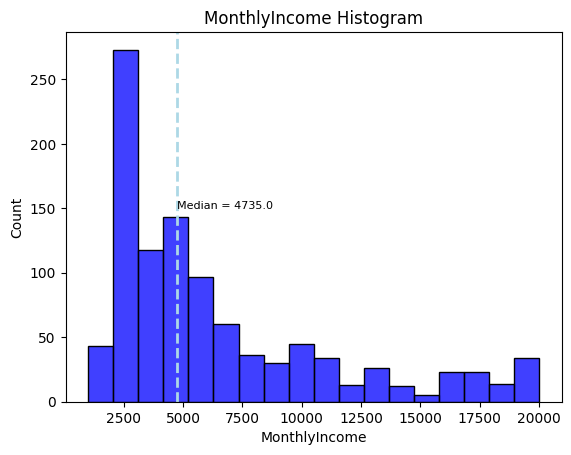

In [21]:
median_MonthlyIncome = df_eda.MonthlyIncome.median()

_ = sns.histplot(df_eda.MonthlyIncome, color="blue")
_ = plt.axvline(median_MonthlyIncome, color="lightblue", linestyle="dashed", linewidth=2)
_ = plt.title("MonthlyIncome Histogram")
_ = plt.text(x=df_eda.MonthlyIncome.median(), y=150, s=f"Median = {median_MonthlyIncome}", fontsize=8)
_ = plt.show()


Univariate exploration to understand a little better some features and how they behave. Now we'll perform some multivariate explorations.

In [22]:
df_eda.groupby(["Resignation"])["MonthlyIncome"].mean()

Resignation
No     6823.22626
Yes    4639.93750
Name: MonthlyIncome, dtype: float64

In [23]:
df_eda.groupby(["Resignation"])["MonthlyIncome"].median()


Resignation
No     5056.0
Yes    2931.0
Name: MonthlyIncome, dtype: float64

Some hypotheses to direct the exploration.


- Do women quit more than men?<br>
- Do employees with low work life balance rate quit more?<br>
- Do employees with low education resign more often?<br>
- Do older employees quit more?<br>
- Do low-paid employees resign more often?<br>
- Do employees with low stock option quit more often?<br>
- Do employees with many years since their last promotion quit more often?<br>
- Do employees who live further away from work quit more often?<br>
- Do employees who travel more frequently quit more?<br>

#### Do women quit more than men?

Although there are more men than women, both resignation are similar.

In [25]:
df_temp = (
    df_eda
    .groupby(["Gender", "Resignation"])
    .size()
    .reset_index(name='Count')
)

fig = px.bar(df_temp, x="Gender", y="Count", color="Resignation", barmode="group", labels={"Count": "Quantity"})

fig.update_layout(
    xaxis=dict(title="Gender"),
    yaxis=dict(title="Quantity"),
    title="Resignation Count by Gender",
    height=400,
    width=600
)

fig.show()


In [26]:
import plotly.graph_objects as go

# Contar o número de funcionários por gênero e status de demissão
counts = df_eda.groupby(['Gender', 'Resignation']).size().unstack()

# Calcular as porcentagens
counts['Total'] = counts['No'] + counts['Yes']
counts['Yes_percentage'] = (counts['Yes'] / counts['Total']) * 100
counts['No_percentage'] = (counts['No'] / counts['Total']) * 100

# Criar o gráfico de barras empilhadas
fig = go.Figure()

fig.add_trace(go.Bar(
    x=counts.index,
    y=counts['Yes_percentage'],
    name='Resigned',
    marker_color='lightblue',
    text=counts['Yes_percentage'].round(1).astype(str) + '%'
))

fig.add_trace(go.Bar(
    x=counts.index,
    y=counts['No_percentage'],
    name='Not Resigned',
    marker_color='orange',
    text=counts['No_percentage'].round(1).astype(str) + '%'
))

fig.update_layout(
    barmode='stack',
    xaxis=dict(title='Gender'),
    yaxis=dict(title='Percentage', showticklabels=False),
    title='Resignation Percentage by Gender',
    height=400,
    width=600
)

fig.show()


#### Do employees with low work life balance rate quit more?

Despite the smaller number of employees, the class that has the worst work-life balance is also the one that resigns the most if we look at the percentage.

In [29]:
df_temp = (
    df_eda
    .groupby(["WorkLifeBalance", "Resignation"])
    .size()
    .reset_index(name='Count')
)

fig = px.bar(df_temp, x="WorkLifeBalance", y="Count", color="Resignation", barmode="group", labels={"Count": "Quantity"})

fig.update_layout(
    xaxis=dict(title="Work Life Balance"),
    yaxis=dict(title="Quantity"),
    title="Resignation Count by Work Life Balance Class",
    height=400,
    width=600
)

fig.show()


In [30]:
import plotly.graph_objects as go

# Contar o número de funcionários por gênero e status de demissão
counts = df_eda.groupby(['WorkLifeBalance', 'Resignation']).size().unstack()

# Calcular as porcentagens
counts['Total'] = counts['No'] + counts['Yes']
counts['Yes_percentage'] = (counts['Yes'] / counts['Total']) * 100
counts['No_percentage'] = (counts['No'] / counts['Total']) * 100

# Criar o gráfico de barras empilhadas
fig = go.Figure()

fig.add_trace(go.Bar(
    x=counts.index,
    y=counts['Yes_percentage'],
    name='Resigned',
    marker_color='lightblue',
    text=counts['Yes_percentage'].round(1).astype(str) + '%'
))

fig.add_trace(go.Bar(
    x=counts.index,
    y=counts['No_percentage'],
    name='Not Resigned',
    marker_color='orange',
    text=counts['No_percentage'].round(1).astype(str) + '%'
))

fig.update_layout(
    barmode='stack',
    xaxis=dict(title='Work Life Balance'),
    yaxis=dict(title='Percentage', showticklabels=False),
    title='Resignation Percentage by Work Life Balance Class',
    height=400,
    width=600
)

fig.show()


#### Do employees with low education resign more often?

Almost all groups have the same Education and Resignation ratio.

In [31]:
df_temp = (
    df_eda
    .groupby(["Education", "Resignation"])
    .size()
    .reset_index(name='Count')
)

fig = px.bar(df_temp, x="Education", y="Count", color="Resignation", barmode="group", labels={"Count": "Quantity"})

fig.update_layout(
    xaxis=dict(title="Education"),
    yaxis=dict(title="Quantity"),
    title="Resignation Count by Education",
    height=400,
    width=600
)

fig.show()


In [32]:
import plotly.graph_objects as go

# Contar o número de funcionários por gênero e status de demissão
counts = df_eda.groupby(['Education', 'Resignation']).size().unstack()

# Calcular as porcentagens
counts['Total'] = counts['No'] + counts['Yes']
counts['Yes_percentage'] = (counts['Yes'] / counts['Total']) * 100
counts['No_percentage'] = (counts['No'] / counts['Total']) * 100

# Criar o gráfico de barras empilhadas
fig = go.Figure()

fig.add_trace(go.Bar(
    x=counts.index,
    y=counts['Yes_percentage'],
    name='Resigned',
    marker_color='lightblue',
    text=counts['Yes_percentage'].round(1).astype(str) + '%'
))

fig.add_trace(go.Bar(
    x=counts.index,
    y=counts['No_percentage'],
    name='Not Resigned',
    marker_color='orange',
    text=counts['No_percentage'].round(1).astype(str) + '%'
))

fig.update_layout(
    barmode='stack',
    xaxis=dict(title='Education'),
    yaxis=dict(title='Percentage', showticklabels=False),
    title='Resignation Percentage by Education',
    height=400,
    width=600
)

fig.show()


#### Do older employees quit more

It seems that the older the employee, the less likely they are to resign. But we have to be cautious because the number of employees in each class also reduces with older ages.

In [56]:
df_temp = df_eda
df_temp['Age_group'] = pd.cut(df_temp['Age'], bins=range(10, 101, 10), right=False, labels=[f"{i}-{i+9}" for i in range(10, 100, 10)])


df_grouped = (
    df_temp
    .groupby(["Age_group", "Resignation"])
    .size()
    .reset_index(name='Count')
)
df_grouped = df_grouped[df_grouped["Count"] > 0]

# fig = px.bar(df_grouped, x="Age_group", y="Count", color="Resignation", barmode="group", orientation="h", labels={"Count": "Quantity"})
fig = px.bar(df_grouped, x="Count", y="Age_group", color="Resignation", barmode="stack", orientation="h", labels={"Count": "Quantity"})

fig.update_layout(
    xaxis=dict(title="Age Group"),
    yaxis=dict(title="Quantity"),
    title="Resignation Count by Age Group",
    height=400,
    width=600
)

fig.show()

In [55]:
df_eda['Age_group'] = pd.cut(df_eda['Age'], bins=range(10, 101, 10), right=False, labels=[f"{i}-{i+9}" for i in range(10, 100, 10)])

counts = df_eda.groupby(['Age_group', 'Resignation']).size().unstack()

counts['Total'] = counts['No'] + counts['Yes']
counts['Yes_percentage'] = (counts['Yes'] / counts['Total']) * 100
counts['No_percentage'] = (counts['No'] / counts['Total']) * 100
counts = counts[counts['Total'] > 0]

counts.index = counts.index.astype(str)

fig = go.Figure()

fig.add_trace(go.Bar(
    y=counts.index,
    x=counts['Yes_percentage'],
    name='Resigned',
    orientation='h',
    marker_color='lightblue',
    text=counts['Yes_percentage'].round(1).astype(str) + '%'
))

fig.add_trace(go.Bar(
    y=counts.index,
    x=counts['No_percentage'],
    name='Not Resigned',
    orientation='h',
    marker_color='orange',
    text=counts['No_percentage'].round(1).astype(str) + '%'
))

fig.update_layout(
    barmode='stack',
    yaxis=dict(title='Age Group'),
    xaxis=dict(title='Percentage'),
    title='Resignation Percentage by Age Group',
    height=400,
    width=600
)

fig.show()


#### Do low-paid employees resign more often?

Employees who resigned have a median monthly income that is 40% lower.

In [59]:
fig = go.Figure()
fig.add_trace(go.Box(
    x=df_eda.Resignation,
    y=df_eda.MonthlyIncome,
    name="Monthly Income",
    boxpoints="outliers",
    marker_color="lightblue"
))

fig.update_layout(
    xaxis=dict(title="Resignation"),
    yaxis=dict(title="Monthly Income"),
    title="Monthly Income by Resignation",
    height=400,
    width=600
)

fig.show()

#### Do employees with low stock option quit more often?

Employees who do not have stock options resign more than others

In [61]:
df_temp = (
    df_eda
    .groupby(["StockOptionLevel", "Resignation"])
    .size()
    .reset_index(name='Count')
)

fig = px.bar(df_temp, x="StockOptionLevel", y="Count", color="Resignation", barmode="group", labels={"Count": "Quantity"})

fig.update_layout(
    xaxis=dict(title="Stock Option Level"),
    yaxis=dict(title="Quantity"),
    title="Resignation Count by Stock Option Level",
    height=400,
    width=600
)

fig.show()


In [62]:
import plotly.graph_objects as go

# Contar o número de funcionários por gênero e status de demissão
counts = df_eda.groupby(['StockOptionLevel', 'Resignation']).size().unstack()

# Calcular as porcentagens
counts['Total'] = counts['No'] + counts['Yes']
counts['Yes_percentage'] = (counts['Yes'] / counts['Total']) * 100
counts['No_percentage'] = (counts['No'] / counts['Total']) * 100

# Criar o gráfico de barras empilhadas
fig = go.Figure()

fig.add_trace(go.Bar(
    x=counts.index,
    y=counts['Yes_percentage'],
    name='Resigned',
    marker_color='lightblue',
    text=counts['Yes_percentage'].round(1).astype(str) + '%'
))

fig.add_trace(go.Bar(
    x=counts.index,
    y=counts['No_percentage'],
    name='Not Resigned',
    marker_color='orange',
    text=counts['No_percentage'].round(1).astype(str) + '%'
))

fig.update_layout(
    barmode='stack',
    xaxis=dict(title='Stock Option Level'),
    yaxis=dict(title='Percentage', showticklabels=False),
    title='Resignation Percentage by Education',
    height=400,
    width=600
)

fig.show()


In [27]:
df_eda.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Resignation'],
      dtype='object')

<!-- fazer grafico de genero pela demissao e pelo salario
acho que tem que fazer o groupy anmtes? preciso confirmar pq seria bom pra verificar se genero tem relacao. -->

In [28]:
# features_to_exclude_zero_one_value = df_raw.nunique() == 1
# features_to_exclude_zero_one_value = df_raw.loc[:, features_to_exclude_zero_one_value].columns
# features_to_exclude_zero_one_value